# FER .ipynb implementation
In this notebook file you can try the Facial expression recognition module.

[You can found the project here](https://github.com/justinshenk/fer)

This Notebook is focused on Video prediction in the cloud with Google Colaboratory GPU.

Ensure that you enable the Free GPU in Colab, and check it with the next cell.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install fer

     |████████████████████████████████| 808kB 2.7MB/s 
     |████████████████████████████████| 2.3MB 15.8MB/s 
  Created wheel for fer: filename=fer-20.0.0-cp36-none-any.whl size=809670 sha256=a3823d3027e3d536bfbd3c3666d79721284afe758014e4d77dcf0df1575cff1b
  Stored in directory: /root/.cache/pip/wheels/6d/e1/94/0bfbdc9d3f376b9f116d5490f2cc8695f7a1d66dbf404a10a5
Successfully built fer


In [3]:
# Upload your file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.mp4 to test.mp4
User uploaded file "test.mp4" with length 556991 bytes


In [4]:
%matplotlib inline
from fer import Video
from fer import FER
import matplotlib.pyplot as plt
import os
import sys
# fn contains the video file name (Ensure that you only upload one file)
videofile = fn
# Face detection
detector = FER(mtcnn=True)
# Video predictions
video = Video(videofile)

# Output list of dictionaries
raw_data = video.analyze(detector, display=False)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.
21-05-2020:04:12:11,206 WARNING  [deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
21-05-2020:04:12:13,807 INFO     [classes.py:209] 24.70 fps, 115 frames, 4.66 seconds
21-05-2020:04:12:13,808 INFO     [classes.py:216] Making directories at output
21-05-2020:04:12:27,813 INFO     [classes.py:311] Completed analysis: saved to output/test_output.mp4


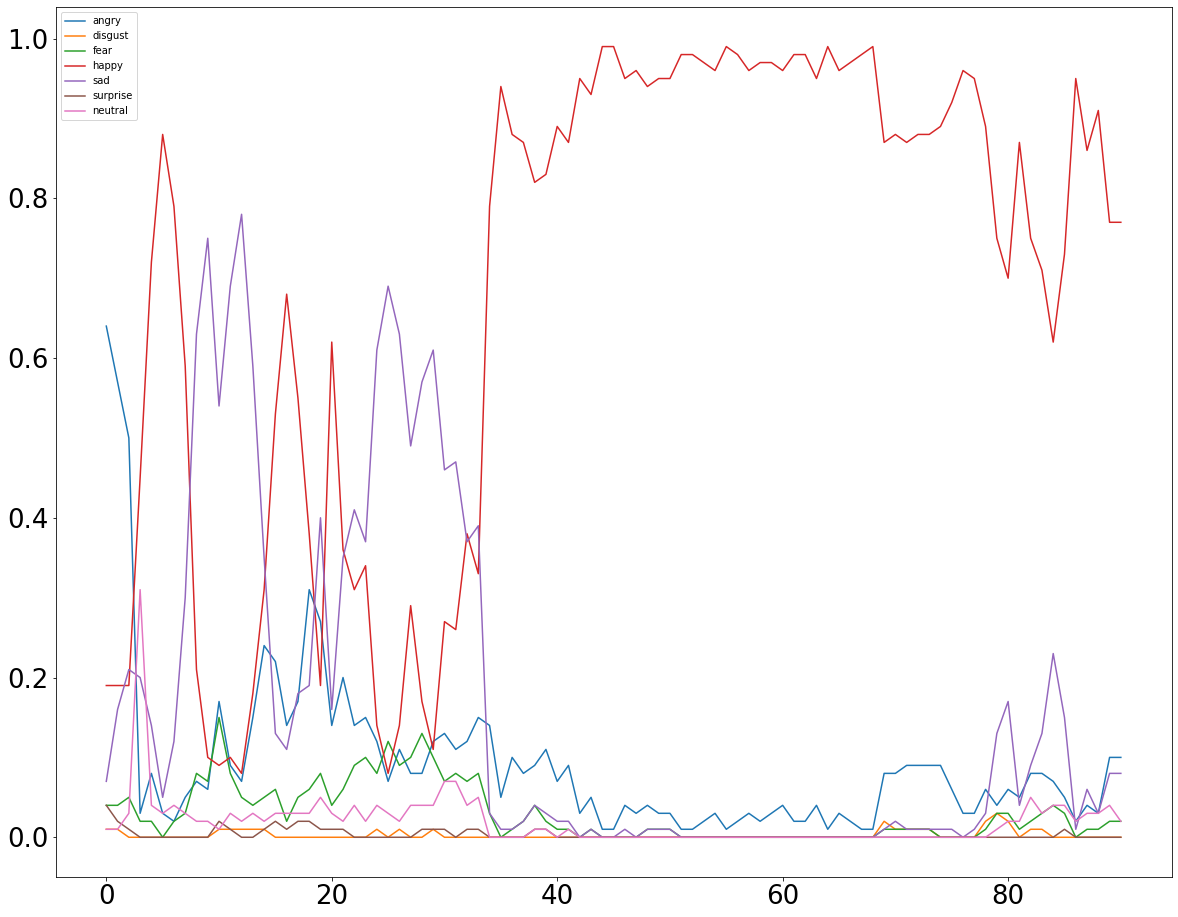

In [5]:
# Convert to pandas for analysis
df = video.to_pandas(raw_data)
df = video.get_first_face(df)
df = video.get_emotions(df)

# Plot emotions
fig = df.plot(figsize=(20, 16), fontsize=26).get_figure()
# Filename for plot
fig.savefig('my_figure.png')